## F770W - NGC 628 - skysub

Author: Karl Gordon

Last modified: 28 Jul 2022

### Variables controling processing and display

In [1]:
filter = "F770W"
fwhm = 2.2
basename = "jw02107039"
basename_bkg = "jw02107040"
exclude_above = None
ds9region = None

output_shape = None
crpix = None
crval = None
rotation = None

tweakreg = False
align_to_gaia = False

matchbkg = False

# display range for images
drange_raw = [12.0, 20.]
# display range for images
drange_cal = [-0.1, 20]
dmap = "afmhot"  # same as ds9 bb

run_cc_image3 = True

In [2]:
import os
import glob
import copy

from astropy.io import ascii, fits
from astropy.visualization import simple_norm

In [3]:
import astropy
print(astropy.__version__)

5.0.4


In [4]:
os.environ["CRDS_PATH"] = "/home/kgordon/crds_cache"
os.environ["CRDS_SERVER_URL"] = "https://jwst-crds-pub.stsci.edu"

In [5]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import ImageGrid

# Use this version for non-interactive plots (easier scrolling of the notebook)
%matplotlib inline

# Use this version (outside of Jupyter Lab) if you want interactive plots
#%matplotlib notebook

# These gymnastics are needed to make the sizes of the figures
# be the same in both the inline and notebook versions
%config InlineBackend.print_figure_kwargs = {'bbox_inches': None}

mpl.rcParams['savefig.dpi'] = 80
mpl.rcParams['figure.dpi'] = 80

In [6]:
# List of possible data quality flags
from jwst.datamodels import dqflags
from jwst import datamodels

from jwst.associations import asn_from_list
from jwst.associations.lib.rules_level2_base import DMSLevel2bBase
from jwst.associations.lib.rules_level3_base import DMS_Level3_Base

# custom helper routines
from helpers.jwst_helpers import show_image
from helpers.miri_clean import make_sky
from helpers.miri_helpers import miri_image3

In [7]:
import jwst
print(jwst.__version__)

1.6.3.dev1+g3e8a10cb.d20220719


## Make a sky and subtract it

In [10]:
miri_cal_files = glob.glob(f"./{filter}/stage2/{basename_bkg}*ge_fixed_wcs_cal.fits")
subfiles = glob.glob(f"./{filter}/stage2/{basename}*ge_fixed_wcs_cal.fits")
simage = make_sky(miri_cal_files, ds9regions=ds9region, subfiles=subfiles)

['./F770W/stage2/jw02107039001_02101_00001_mirimage_fixed_wcs_cal.fits', './F770W/stage2/jw02107039001_02101_00002_mirimage_fixed_wcs_cal.fits', './F770W/stage2/jw02107039001_02101_00003_mirimage_fixed_wcs_cal.fits', './F770W/stage2/jw02107039001_02101_00004_mirimage_fixed_wcs_cal.fits', './F770W/stage2/jw02107039002_02101_00001_mirimage_fixed_wcs_cal.fits', './F770W/stage2/jw02107039002_02101_00002_mirimage_fixed_wcs_cal.fits', './F770W/stage2/jw02107039002_02101_00003_mirimage_fixed_wcs_cal.fits', './F770W/stage2/jw02107039002_02101_00004_mirimage_fixed_wcs_cal.fits', './F770W/stage2/jw02107039003_02101_00001_mirimage_fixed_wcs_cal.fits', './F770W/stage2/jw02107039003_02101_00002_mirimage_fixed_wcs_cal.fits', './F770W/stage2/jw02107039003_02101_00003_mirimage_fixed_wcs_cal.fits', './F770W/stage2/jw02107039003_02101_00004_mirimage_fixed_wcs_cal.fits']
processing ./F770W/stage2/jw02107040001_02201_00001_mirimage_fixed_wcs_cal.fits
median sky = 12.189926147460938
processing ./F770W/stag

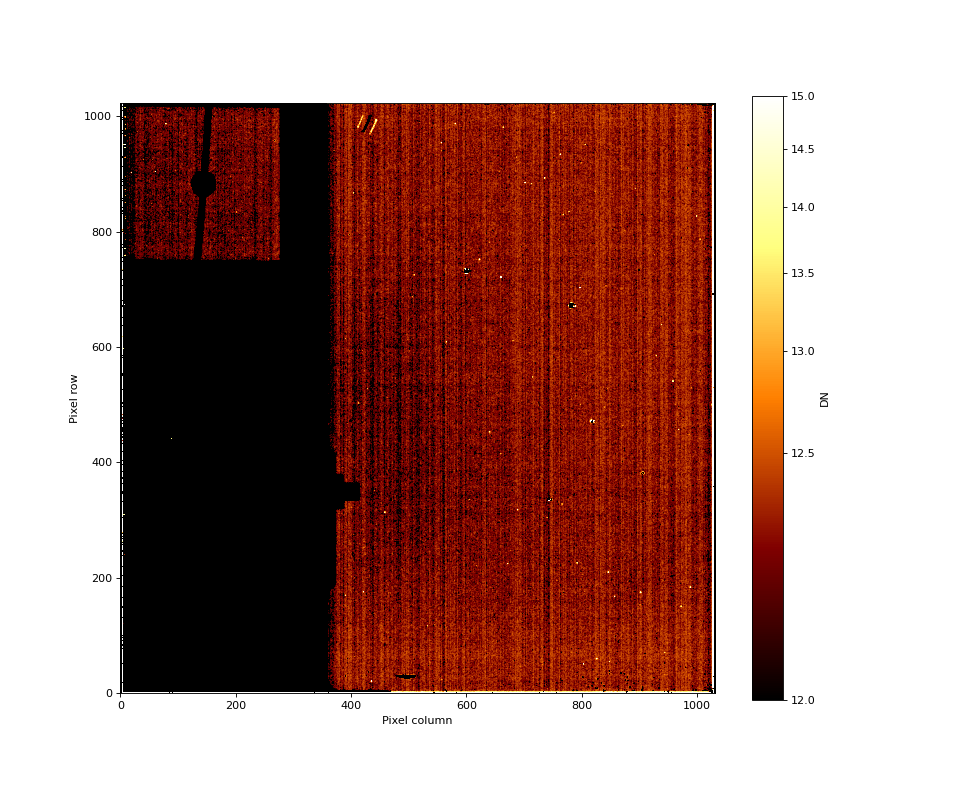

In [11]:
show_image(simage, 12., 15., dmap=dmap)

### rerun CALWEBB_IMAGE3 with the new cleaned files

In [13]:
if run_cc_image3:
    miri_cccal_files = glob.glob(f"./{filter}/stage2/{basename}*ge_fixed_wcs_skysub_cal.fits")
    output_dir = f"./{filter}/stage3/"
    print(miri_cccal_files)

    if rotation is not None:
        miri_asn_name = f'miri_{filter}_stage3_nirproj_asn_skysub'
    else: 
        miri_asn_name = f'miri_{filter}_stage3_asn_skysub'   
    miri_asn = asn_from_list.asn_from_list(miri_cccal_files, rule=DMS_Level3_Base, product_name=miri_asn_name)

    miri_asn_file = f'{miri_asn_name}.json'
    with open(miri_asn_file, 'w') as outfile:
        name, serialized = miri_asn.dump(format='json')
        outfile.write(serialized)

['./F770W/stage2/jw02107039001_02101_00001_mirimage_fixed_wcs_skysub_cal.fits', './F770W/stage2/jw02107039001_02101_00002_mirimage_fixed_wcs_skysub_cal.fits', './F770W/stage2/jw02107039001_02101_00003_mirimage_fixed_wcs_skysub_cal.fits', './F770W/stage2/jw02107039001_02101_00004_mirimage_fixed_wcs_skysub_cal.fits', './F770W/stage2/jw02107039002_02101_00001_mirimage_fixed_wcs_skysub_cal.fits', './F770W/stage2/jw02107039002_02101_00002_mirimage_fixed_wcs_skysub_cal.fits', './F770W/stage2/jw02107039002_02101_00003_mirimage_fixed_wcs_skysub_cal.fits', './F770W/stage2/jw02107039002_02101_00004_mirimage_fixed_wcs_skysub_cal.fits', './F770W/stage2/jw02107039003_02101_00001_mirimage_fixed_wcs_skysub_cal.fits', './F770W/stage2/jw02107039003_02101_00002_mirimage_fixed_wcs_skysub_cal.fits', './F770W/stage2/jw02107039003_02101_00003_mirimage_fixed_wcs_skysub_cal.fits', './F770W/stage2/jw02107039003_02101_00004_mirimage_fixed_wcs_skysub_cal.fits']


In [14]:
if run_cc_image3:
    miri_image3(miri_asn_file, output_dir, fwhm=fwhm, matchbkg=matchbkg,
                crval=crval, crpix=crpix, rotation=rotation, output_shape=output_shape,
                tweakreg=tweakreg, align_to_gaia=align_to_gaia)

2022-07-28 10:02:38,270 - stpipe.Image3Pipeline - INFO - Image3Pipeline instance created.
2022-07-28 10:02:38,272 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': True, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'assign_mtwcs', 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-28 10:02:38,273 - stpipe.Image3Pipeline.assign_mtwcs - INFO - AssignMTWcsStep instance created.
2022-07-28 10:02:38,277 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': True, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'save_catalogs': False, 'catalog_format': 'ecsv', 'kernel_fwhm': 2.5, 'snr_threshold': 10.0, 'brightest': 200, 'peakmax': None, 'enforce_user_order': False, 'expand_re

2022-07-28 10:02:39,585 - stpipe.Image3Pipeline - INFO - Prefetch for DRIZPARS reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits'.
2022-07-28 10:02:39,586 - stpipe.Image3Pipeline - INFO - Starting calwebb_image3 ...
2022-07-28 10:02:44,457 - stpipe.Image3Pipeline.tweakreg - INFO - Step tweakreg running with args (<ModelContainer>,).
2022-07-28 10:02:44,462 - stpipe.Image3Pipeline.tweakreg - INFO - Step tweakreg parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': True, 'output_use_index': True, 'save_results': True, 'skip': True, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_catalogs': False, 'catalog_format': 'ecsv', 'kernel_fwhm': 2.2, 'snr_threshold': 5, 'brightest': 200, 'peakmax': None, 'enforce_user_order': False, 'expand_refcat': False, 'minobj': 5, 'searchrad': 5.0, 'use2dhist': True, 'separation': 1.0, 'tolerance': 0.7, 'xoffset': 

2022-07-28 10:03:29,705 - stpipe.Image3Pipeline.outlier_detection - INFO - Saved model in ./F770W/stage3/jw02107039001_02101_00003_mirimage_fixed_wcs_skysub_a3001_crf.fits
2022-07-28 10:03:30,245 - stpipe.Image3Pipeline.outlier_detection - INFO - Saved model in ./F770W/stage3/jw02107039001_02101_00004_mirimage_fixed_wcs_skysub_a3001_crf.fits
2022-07-28 10:03:30,788 - stpipe.Image3Pipeline.outlier_detection - INFO - Saved model in ./F770W/stage3/jw02107039002_02101_00001_mirimage_fixed_wcs_skysub_a3001_crf.fits
2022-07-28 10:03:31,348 - stpipe.Image3Pipeline.outlier_detection - INFO - Saved model in ./F770W/stage3/jw02107039002_02101_00002_mirimage_fixed_wcs_skysub_a3001_crf.fits
2022-07-28 10:03:31,910 - stpipe.Image3Pipeline.outlier_detection - INFO - Saved model in ./F770W/stage3/jw02107039002_02101_00003_mirimage_fixed_wcs_skysub_a3001_crf.fits
2022-07-28 10:03:32,474 - stpipe.Image3Pipeline.outlier_detection - INFO - Saved model in ./F770W/stage3/jw02107039002_02101_00004_mirimage_

2022-07-28 10:04:46,786 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1188, 2399)
2022-07-28 10:04:48,357 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1188, 2399)
2022-07-28 10:04:49,916 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1188, 2399)
2022-07-28 10:04:51,506 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1188, 2399)
2022-07-28 10:04:52,270 - stpipe.Image3Pipeline.resample - INFO - Update S_REGION to POLYGON ICRS  24.176499523 15.828383654 24.141047137 15.815963797 24.167111308 15.747085617 24.202553241 15.759501254
2022-07-28 10:04:53,297 - stpipe.Image3Pipeline.resample - INFO - Saved model in ./F770W/stage3/miri_F770W_stage3_asn_skysub_i2d.fits
2022-07-28 10:04:53,299 - stpipe.Image3Pipeline.resample - INFO - Step resample done
2022-07-28 10:04:53,576 - stpipe.Image3Pipeline.source_catalog - INFO - Step source_catalog running with args (<ImageModel(1188, 2399) from miri_F770W_sta

In [15]:
# Look at the resulting mosaic image
miri_mosaic_file = output_dir + miri_asn_name + '_i2d.fits'
miri_mosaic = datamodels.open(miri_mosaic_file)

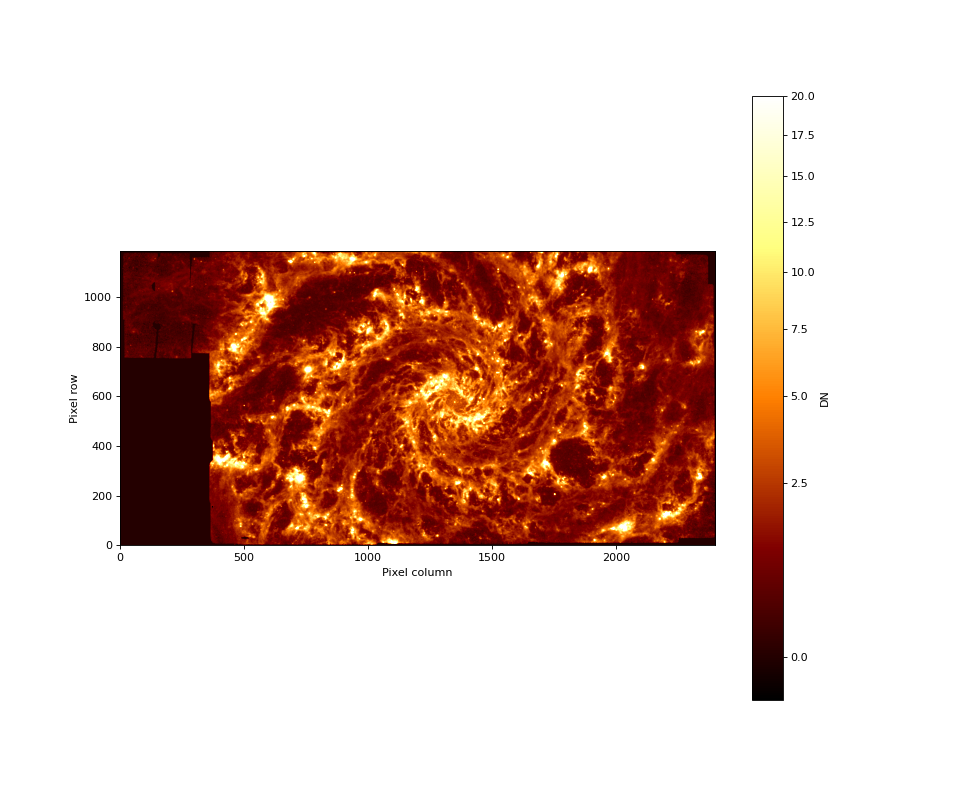

In [16]:
drange = drange_cal
# Look at the mosaic
show_image(miri_mosaic.data, vmin=drange[0], vmax=drange[1], dmap=dmap)